In [1]:
#Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb

In [2]:
#loading in the data
# Load the linker dataset
df = pd.read_csv('linker.csv')
print(df.head(5))
    
    # Print initial dataset information
print("\nDataset shape:", df.shape)
print("Columns:", df.columns)

   Compound ID                 Smiles                       Smiles_R  \
0            1                CCOCCOC                [R1]CCOCCOC[R2]   
1            2          CCOCCOCCOCCOC          [R1]CCOCCOCCOCCOC[R2]   
2            3        CCNC(=O)COCCOCC        [R1]CCOCCOCC(=O)NCC[R2]   
3            4  CCNC(=O)COCCOCCOCCOCC  [R1]CCOCCOCCOCCOCC(=O)NCC[R2]   
4            5             CCOCCOCC=O           [R1]CCOCCOCC(=O)[R2]   

   Molecular Weight  Exact Mass  XLogP3  Heavy Atom Count  Ring Count  \
0           104.149  104.083730    0.30                 7           0   
1           192.255  192.136159    0.00                13           0   
2           175.228  175.120843    0.01                12           0   
3           263.334  263.173273   -0.29                18           0   
4           132.159  132.078644   -0.17                 9           0   

   Hydrogen Bond Acceptor Count  Hydrogen Bond Donor Count  \
0                             2                          0   
1   

In [3]:
#selecting out numerical features
numerical_features = ['Molecular Weight', 'Exact Mass', 'Heavy Atom Count',
                         'Ring Count', 'Hydrogen Bond Acceptor Count',
                         'Hydrogen Bond Donor Count', 'Rotatable Bond Count',
                         'Topological Polar Surface Area']
    
# Create feature matrix and target variable
X = df[numerical_features]
y = df['XLogP3']
    
# Print statistics
print("\nFeature statistics:")
print(X.describe())
print("\nTarget variable statistics:")
print(y.describe())


Feature statistics:
       Molecular Weight   Exact Mass  Heavy Atom Count   Ring Count  \
count       2749.000000  2749.000000       2749.000000  2749.000000   
mean         215.029002   214.886548         15.090578     0.692615   
std           82.819709    82.766742          5.833087     0.805562   
min           16.043000    16.031300          1.000000     0.000000   
25%          157.301000   157.183050         11.000000     0.000000   
50%          206.333000   206.178299         15.000000     1.000000   
75%          265.353000   265.188923         19.000000     1.000000   
max          851.863000   851.322516         61.000000     5.000000   

       Hydrogen Bond Acceptor Count  Hydrogen Bond Donor Count  \
count                   2749.000000                2749.000000   
mean                       3.443070                   1.104765   
std                        2.099971                   0.883668   
min                        0.000000                   0.000000   
25%      

In [8]:
pip install ydata-profiling

Note: you may need to restart the kernel to use updated packages.


In [9]:
from ydata_profiling import ProfileReport

In [10]:
y = ProfileReport(df)
y
y.to_file("Raw_profile_reportNote.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
#for this we use the describe function on the dataset
df.describe()

,Compound ID,Molecular Weight,Exact Mass,XLogP3,Heavy Atom Count,Ring Count,Hydrogen Bond Acceptor Count,Hydrogen Bond Donor Count,Rotatable Bond Count,Topological Polar Surface Area
count,2749.000000,2749.000000,2749.000000,2749.000000,2749.000000,2749.000000,2749.000000,2749.000000,2749.000000,2749.000000
mean,1376.193525,215.029002,214.886548,0.761277,15.090578,0.692615,3.443070,1.104765,7.883230,51.134001
std,794.990831,82.819709,82.766742,1.873660,5.833087,0.805562,2.099971,0.883668,5.123565,28.174187
min,1.000000,16.043000,16.031300,-3.800000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,688.000000,157.301000,157.183050,-0.610000,11.000000,0.000000,2.000000,1.000000,4.000000,29.100000
50%,1375.000000,206.333000,206.178299,0.500000,15.000000,1.000000,3.000000,1.000000,7.000000,47.610000
75%,2065.000000,265.353000,265.188923,1.900000,19.000000,1.000000,5.000000,2.000000,11.000000,69.560000
max,2753.000000,851.863000,851.322516,8.340000,61.000000,5.000000,15.000000,8.000000,36.000000,292.630000



Feature statistics:
       Molecular Weight   Exact Mass  Heavy Atom Count   Ring Count  \
count       2749.000000  2749.000000       2749.000000  2749.000000   
mean         215.029002   214.886548         15.090578     0.692615   
std           82.819709    82.766742          5.833087     0.805562   
min           16.043000    16.031300          1.000000     0.000000   
25%          157.301000   157.183050         11.000000     0.000000   
50%          206.333000   206.178299         15.000000     1.000000   
75%          265.353000   265.188923         19.000000     1.000000   
max          851.863000   851.322516         61.000000     5.000000   

       Hydrogen Bond Acceptor Count  Hydrogen Bond Donor Count  \
count                   2749.000000                2749.000000   
mean                       3.443070                   1.104765   
std                        2.099971                   0.883668   
min                        0.000000                   0.000000   
25%      

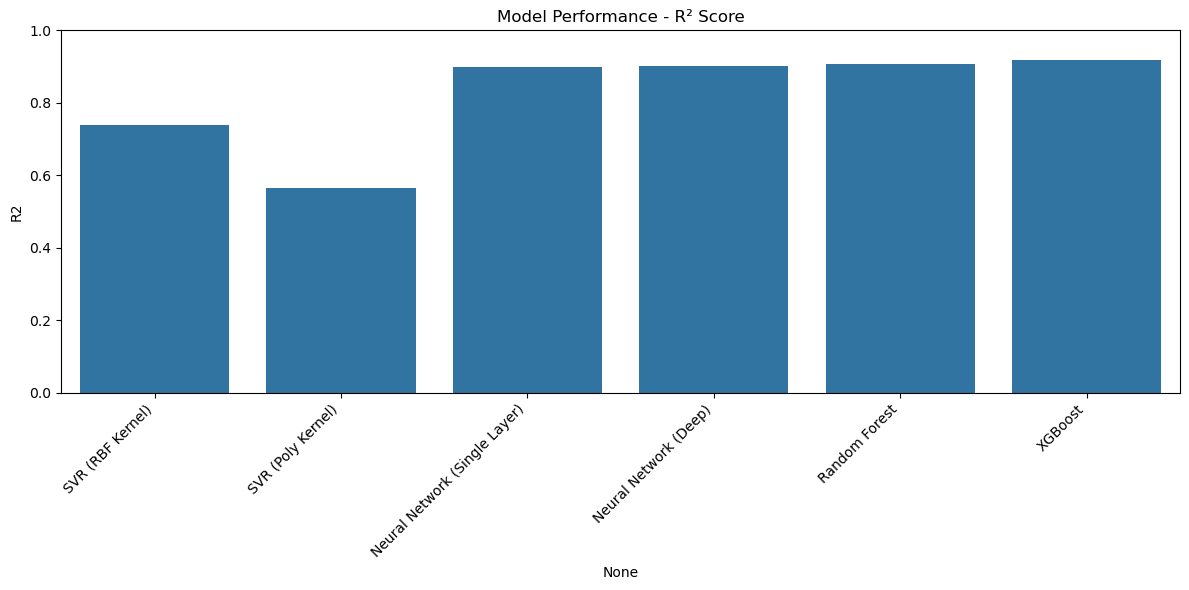

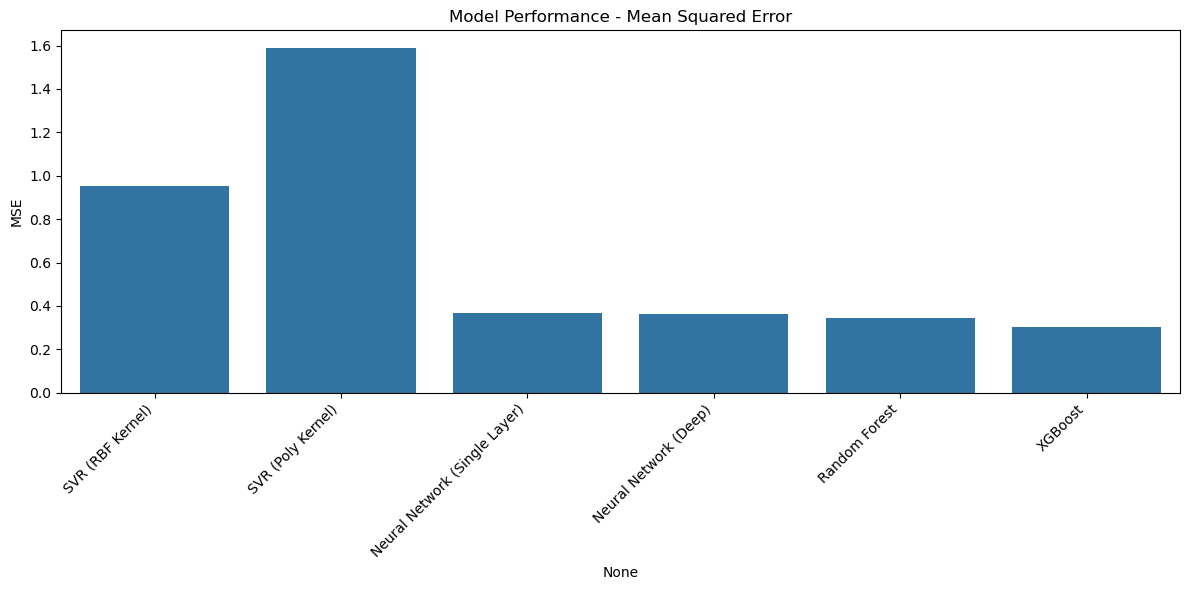

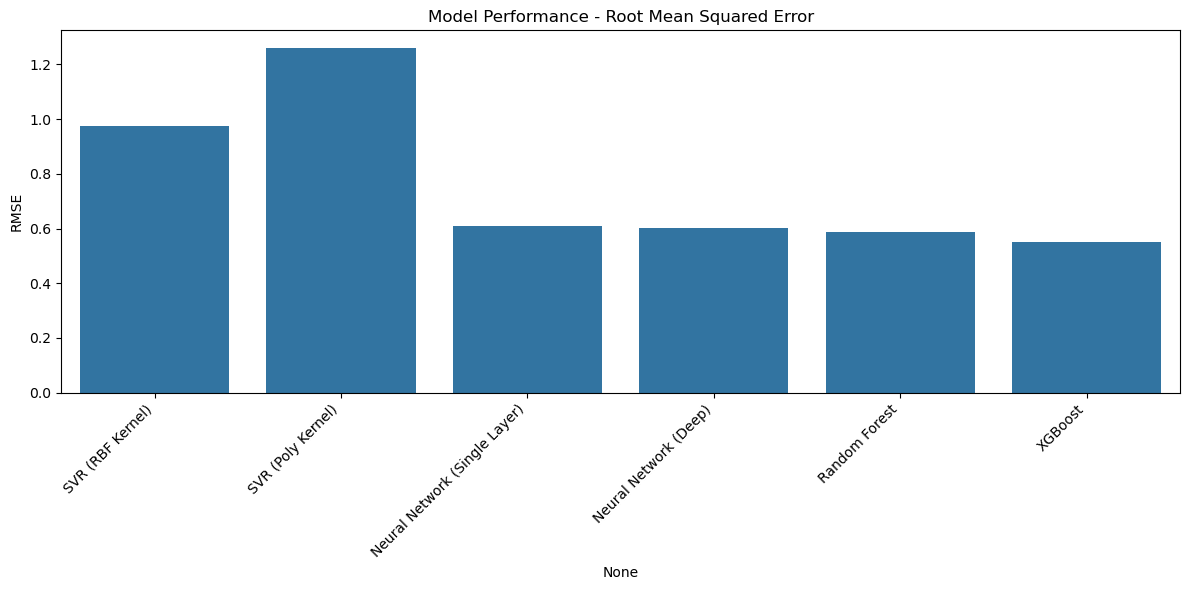

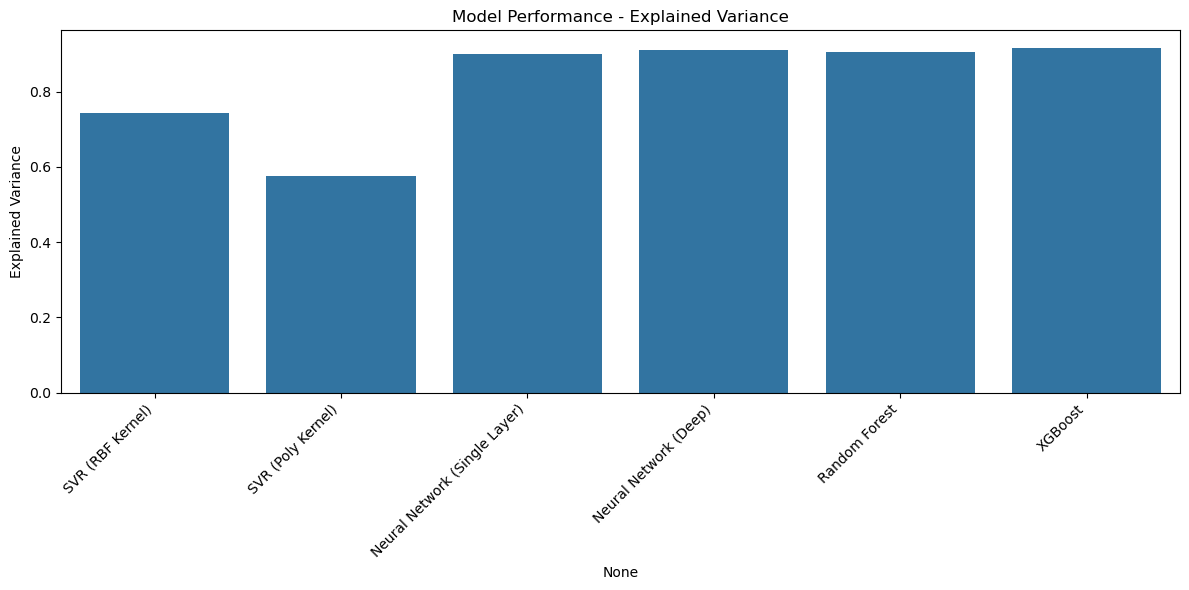

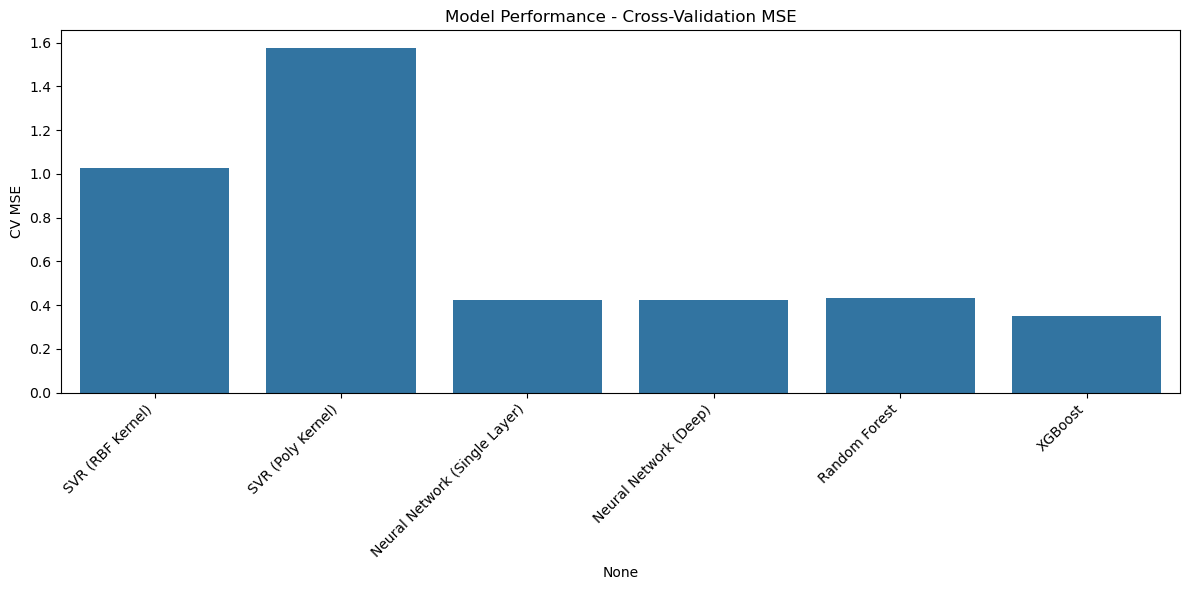

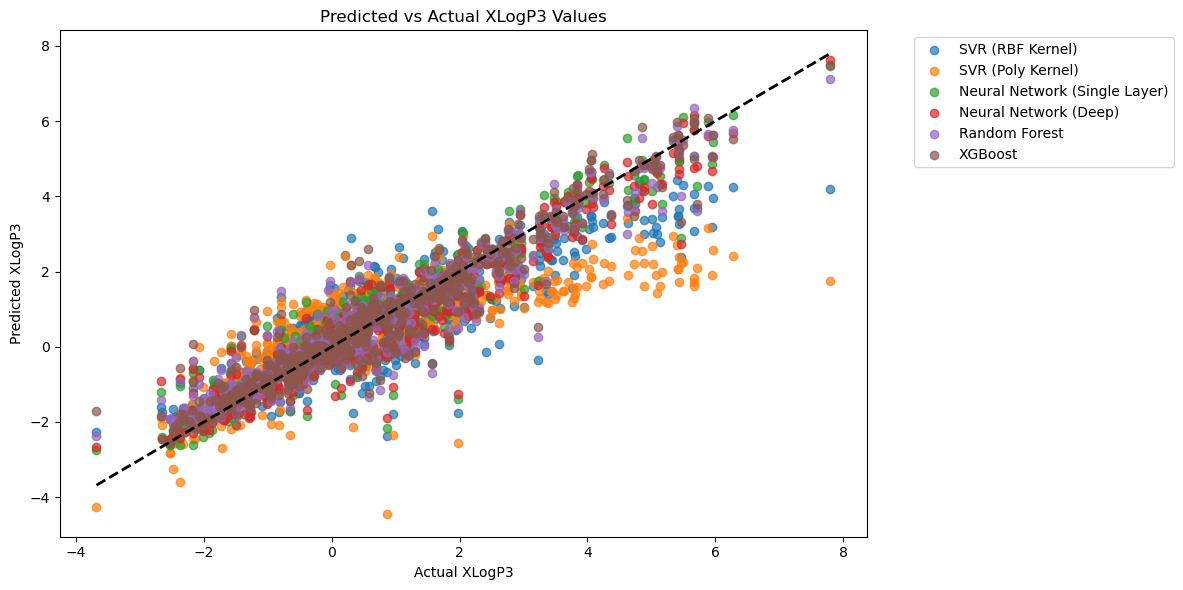

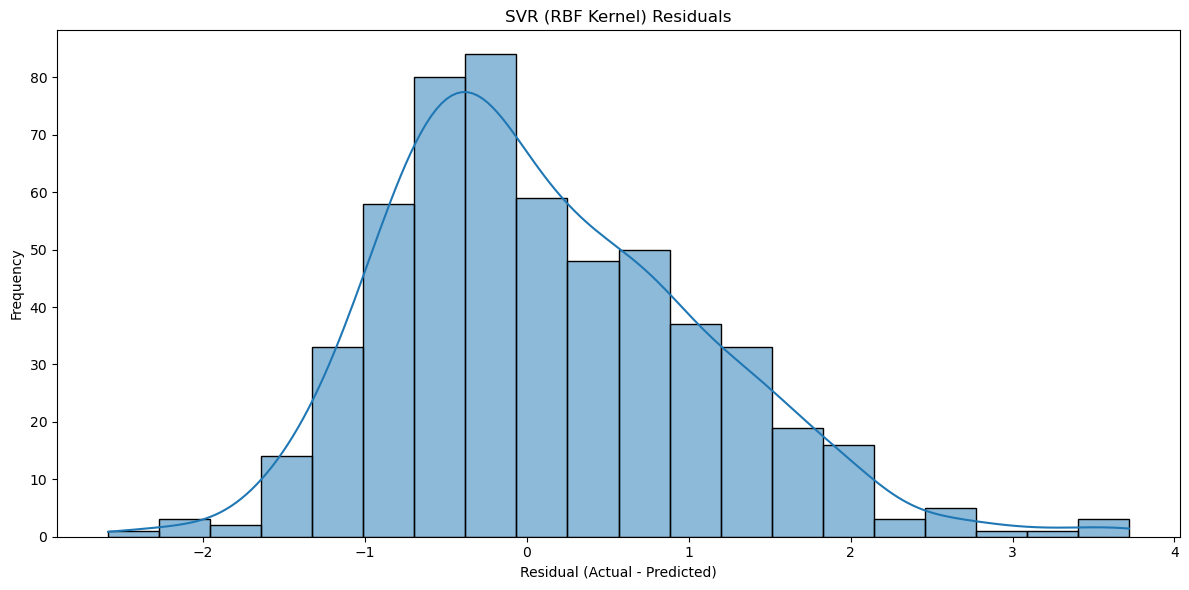

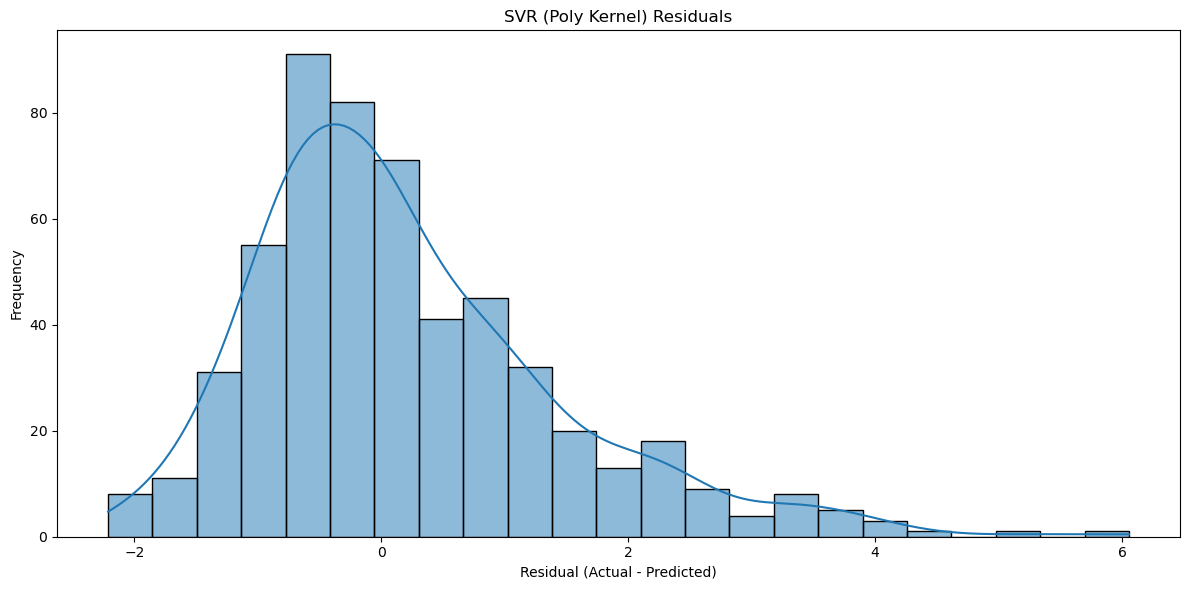

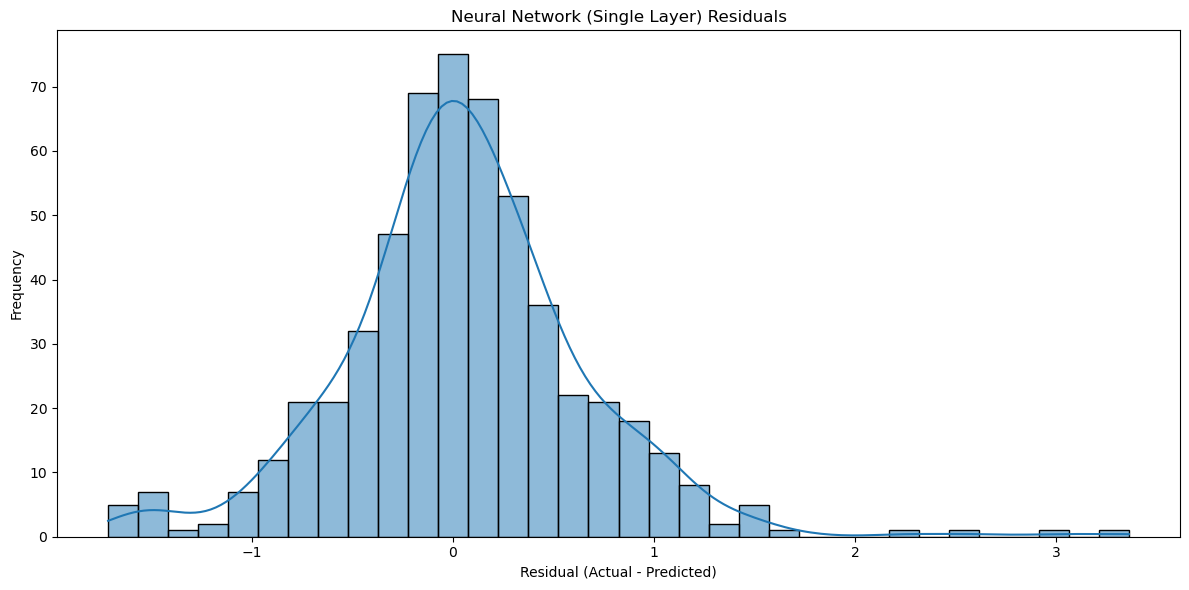

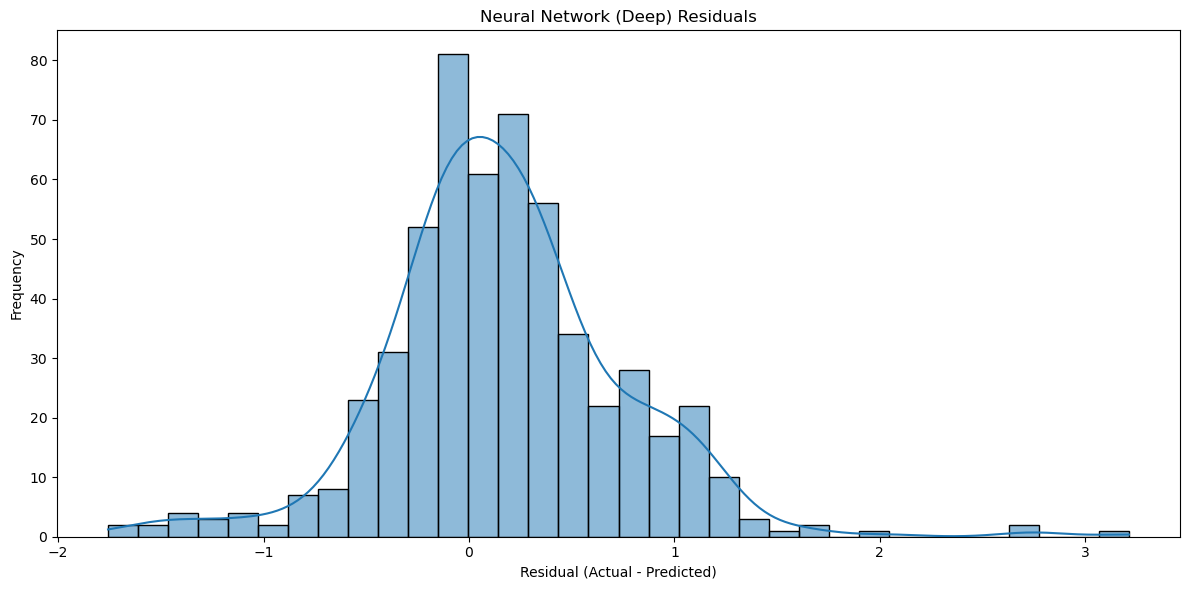

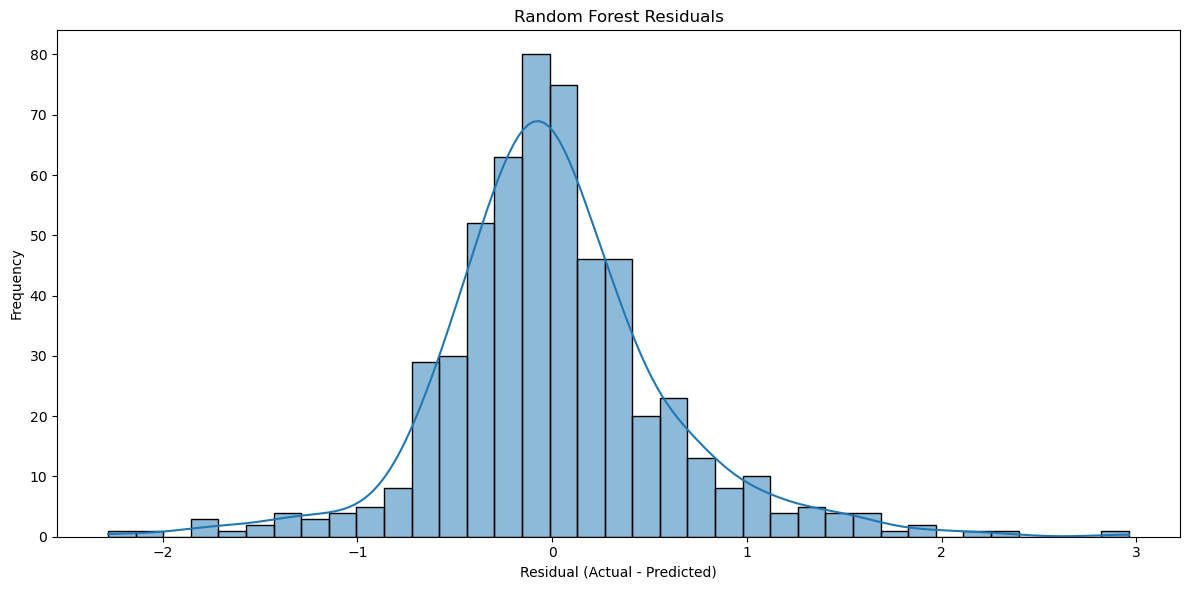

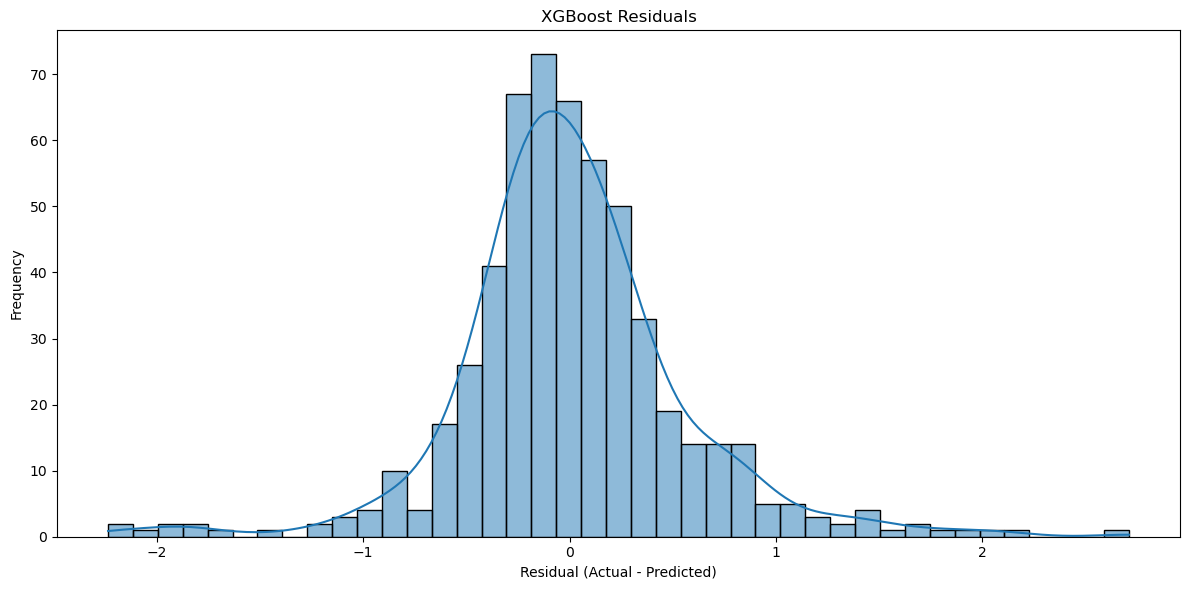

Skipping Random Forest in feature importance plot - mismatched feature counts
Skipping XGBoost in feature importance plot - mismatched feature counts

Detailed Model Performance:

SVR (RBF Kernel):
MSE: 0.9518
MAE: 0.7686
R2: 0.7400
Explained Variance: 0.7433
RMSE: 0.9756
CV MSE: 1.0258

SVR (Poly Kernel):
MSE: 1.5908
MAE: 0.9273
R2: 0.5654
Explained Variance: 0.5759
RMSE: 1.2613
CV MSE: 1.5779

Neural Network (Single Layer):
MSE: 0.3691
MAE: 0.4378
R2: 0.8992
Explained Variance: 0.8999
RMSE: 0.6076
CV MSE: 0.4226

Neural Network (Deep):
MSE: 0.3610
MAE: 0.4347
R2: 0.9014
Explained Variance: 0.9093
RMSE: 0.6008
CV MSE: 0.4257

Random Forest:
MSE: 0.3451
MAE: 0.4162
R2: 0.9057
Explained Variance: 0.9057
RMSE: 0.5875
CV MSE: 0.4328

XGBoost:
MSE: 0.3039
MAE: 0.3814
R2: 0.9170
Explained Variance: 0.9170
RMSE: 0.5513
CV MSE: 0.3491


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.base import clone
from sklearn.linear_model import LinearRegression  # Added Linear Regression
# Import XGBRegressor
from xgboost import XGBRegressor

def save_plot(plt, filename):
    """Helper function to save and show plot"""
    try:
        plt.tight_layout()
        plt.savefig(f'plots/{filename}.png', dpi=300, bbox_inches='tight')
        plt.show()
    except Exception as e:
        print(f"Error saving plot {filename}: {str(e)}")

def plot_model_performance(results):
    """Plot model performance metrics"""
    results_df = pd.DataFrame(results).T
    
    # Create plots directory if it doesn't exist
    if not os.path.exists('plots'):
        os.makedirs('plots')
    
    # R² Score
    plt.figure(figsize=(12, 6))
    sns.barplot(x=results_df.index, y=results_df['R2'])
    plt.title('Model Performance - R² Score')
    plt.ylim(0, 1)
    plt.xticks(rotation=45, ha='right')
    save_plot(plt, 'r2_score')
    
    # MSE
    plt.figure(figsize=(12, 6))
    sns.barplot(x=results_df.index, y=results_df['MSE'])
    plt.title('Model Performance - Mean Squared Error')
    plt.xticks(rotation=45, ha='right')
    save_plot(plt, 'mse')
    
    # RMSE
    plt.figure(figsize=(12, 6))
    sns.barplot(x=results_df.index, y=results_df['RMSE'])
    plt.title('Model Performance - Root Mean Squared Error')
    plt.xticks(rotation=45, ha='right')
    save_plot(plt, 'rmse')
    
    # Explained Variance
    plt.figure(figsize=(12, 6))
    sns.barplot(x=results_df.index, y=results_df['Explained Variance'])
    plt.title('Model Performance - Explained Variance')
    plt.xticks(rotation=45, ha='right')
    save_plot(plt, 'explained_variance')
    
    # Cross-validation MSE
    plt.figure(figsize=(12, 6))
    sns.barplot(x=results_df.index, y=results_df['CV MSE'])
    plt.title('Model Performance - Cross-Validation MSE')
    plt.xticks(rotation=45, ha='right')
    save_plot(plt, 'cv_mse')

def plot_predicted_vs_actual(results):
    """Plot predicted vs actual values for each model"""
    plt.figure(figsize=(12, 6))
    
    # Create plots directory if it doesn't exist
    if not os.path.exists('plots'):
        os.makedirs('plots')
    
    for model_name, metrics in results.items():
        y_pred = metrics['Predictions']
        y_test = metrics['Actual']
        
        # Check for valid predictions
        if len(y_pred) != len(y_test):
            print(f"Skipping {model_name} in predicted vs actual plot - prediction length mismatch")
            continue
            
        plt.scatter(y_test, y_pred, label=model_name, alpha=0.7)
    
    # Add perfect prediction line
    if results:  # Only add if we have valid results
        min_val = min([min(metrics['Actual']) for metrics in results.values()])
        max_val = max([max(metrics['Actual']) for metrics in results.values()])
        plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)
    
    plt.title('Predicted vs Actual XLogP3 Values')
    plt.xlabel('Actual XLogP3')
    plt.ylabel('Predicted XLogP3')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    save_plot(plt, 'predicted_vs_actual')

def plot_residuals(results):
    """Plot residuals for each model"""
    # Create plots directory if it doesn't exist
    if not os.path.exists('plots'):
        os.makedirs('plots')
    
    # Create separate plots for each model
    for model_name, metrics in results.items():
        plt.figure(figsize=(12, 6))
        
        # Check for valid data
        if len(metrics['Actual']) != len(metrics['Predictions']):
            print(f"Skipping {model_name} in residuals plot - data length mismatch")
            continue
            
        # Plot histogram of residuals
        residuals = metrics['Actual'] - metrics['Predictions']
        sns.histplot(residuals, kde=True)
        plt.title(f'{model_name} Residuals')
        plt.xlabel('Residual (Actual - Predicted)')
        plt.ylabel('Frequency')
        save_plot(plt, f'residuals_{model_name.replace(" ", "_")}')

def plot_feature_importance(results, transformer, X_train):
    """Plot feature importance for tree-based models"""
    # Create plots directory if it doesn't exist
    if not os.path.exists('plots'):
        os.makedirs('plots')
    
    # Get selected features
    X_preprocessed = transformer.transform(X_train)
    selected_features = transformer.named_transformers_['select'].get_support()
    
    # Get only the selected feature names
    feature_names = X_train.columns[selected_features]
    
    # Create separate plots for each tree-based model
    for model_name, metrics in results.items():
        if 'Random Forest' in model_name or 'XGBoost' in model_name:
            plt.figure(figsize=(12, 6))
            
            try:
                # Get feature importances
                if 'Random Forest' in model_name:
                    importances = metrics['Model'].feature_importances_
                else:
                    importances = metrics['Model'].feature_importances_
                
                # Check if we have valid importances
                if len(importances) != len(feature_names):
                    print(f"Skipping {model_name} in feature importance plot - mismatched feature counts")
                    continue
                
                # Sort and plot
                sorted_idx = importances.argsort()
                plt.barh(range(len(importances)), importances[sorted_idx], align='center')
                
                # Only use the selected feature names
                plt.yticks(range(len(importances)), feature_names[sorted_idx])
                plt.xlabel('Feature Importance')
                plt.title(f'{model_name} Feature Importance')
                save_plot(plt, f'feature_importance_{model_name.replace(" ", "_")}')
                
            except Exception as e:
                print(f"Error plotting feature importance for {model_name}: {str(e)}")

def load_and_preprocess_data():
    # Load the linker dataset
    df = pd.read_csv('linker.csv')
    
    # Select numerical features
    numerical_features = ['Molecular Weight', 'Exact Mass', 'Heavy Atom Count',
                         'Ring Count', 'Hydrogen Bond Acceptor Count',
                         'Hydrogen Bond Donor Count', 'Rotatable Bond Count',
                         'Topological Polar Surface Area']
    
    # Create feature matrix and target variable
    X = df[numerical_features]
    y = df['XLogP3']
    
    # Print statistics
    print("\nFeature statistics:")
    print(X.describe())
    print("\nTarget variable statistics:")
    print(y.describe())
    
    return X, y

def feature_selection(X, y):
    # Create preprocessing pipeline
    preprocessor = ColumnTransformer(
        transformers=[
            ('scaler', StandardScaler(), list(X.columns))
        ],
        remainder='passthrough'
    )
    
    # First, preprocess the data
    X_preprocessed = preprocessor.fit_transform(X)
    
    # Then select features
    selector = SelectKBest(f_regression, k=5)
    X_selected = selector.fit_transform(X_preprocessed, y)
    
    # Get the names of selected features
    selected_features = X.columns[selector.get_support()].tolist()
    print("\nSelected features:", selected_features)
    
    # Get only the selected feature names
    feature_names = X_train.columns[selected_features]
    
    # Create separate plots for each tree-based model
    for model_name, metrics in results.items():
        if 'Random Forest' in model_name or 'XGBoost' in model_name:
            plt.figure(figsize=(10, 6))
            
            try:
                # Get feature importances
                if 'Random Forest' in model_name:
                    importances = metrics['Model'].feature_importances_
                else:
                    importances = metrics['Model'].feature_importances_
                
                # Check if we have valid importances
                if len(importances) != len(feature_names):
                    print(f"Skipping {model_name} in feature importance plot - mismatched feature counts")
                    continue
                
                # Sort and plot
                sorted_idx = importances.argsort()
                plt.barh(range(len(importances)), importances[sorted_idx], align='center')
                
                # Only use the selected feature names
                plt.yticks(range(len(importances)), feature_names[sorted_idx])
                plt.xlabel('Feature Importance')
                plt.title(f'{model_name} Feature Importance')
                save_plot(plt, f'feature_importance_{model_name.replace(" ", "_")}')
                
            except Exception as e:
                print(f"Error plotting feature importance for {model_name}: {str(e)}")

def load_and_preprocess_data():
    # Load the linker dataset
    df = pd.read_csv('linker.csv')
    
    # Select numerical features
    numerical_features = ['Molecular Weight', 'Exact Mass', 'Heavy Atom Count',
                         'Ring Count', 'Hydrogen Bond Acceptor Count',
                         'Hydrogen Bond Donor Count', 'Rotatable Bond Count',
                         'Topological Polar Surface Area']
    
    # Create feature matrix and target variable
    X = df[numerical_features]
    y = df['XLogP3']
    
    # Print statistics
    print("\nFeature statistics:")
    print(X.describe())
    print("\nTarget variable statistics:")
    print(y.describe())
    
    return X, y

def feature_selection(X, y):
    # Create preprocessing pipeline
    preprocessor = ColumnTransformer(
        transformers=[
            ('scaler', StandardScaler(), list(X.columns))
        ],
        remainder='passthrough'
    )
    
    # First, preprocess the data
    X_preprocessed = preprocessor.fit_transform(X)
    
    # Then select features
    selector = SelectKBest(f_regression, k=5)
    X_selected = selector.fit_transform(X_preprocessed, y)
    
    # Get the names of selected features
    selected_features = X.columns[selector.get_support()].tolist()
    print("\nSelected features:", selected_features)
    
    # Create the transformer with fitted components
    transformer = ColumnTransformer(
        transformers=[
            ('preprocess', preprocessor, list(X.columns)),
            ('select', selector, list(X.columns))
        ],
        remainder='drop'
    )
    
    transformer.fit(X, y)
    
    return X_selected, transformer

def spot_check_models(X_train, X_test, y_train, y_test, transformer):
    # Define models with optimized parameters
    models = {
        # Support Vector Machine
        'SVR (RBF Kernel)': SVR(kernel='rbf', C=1.0, epsilon=0.1, gamma='scale'),
        'SVR (Poly Kernel)': SVR(kernel='poly', degree=2, C=1.0, epsilon=0.1),
        
        # Neural Network
        'Neural Network (Single Layer)': MLPRegressor(
            hidden_layer_sizes=(64,), activation='relu', solver='adam', max_iter=1000, random_state=42
        ),
        'Neural Network (Deep)': MLPRegressor(
            hidden_layer_sizes=(128, 64, 32), activation='relu', solver='adam', max_iter=1000, random_state=42
        ),
        
        # Tree-based models for feature importance
        'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
        'XGBoost': XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42)
    }
    
    results = {}
    
    print("\nEvaluating models:")
    
    for name, model in models.items():
        print(f"\n{name}:")
        
        # Preprocess and select features for training data
        X_train_preprocessed = transformer.transform(X_train)
        
        # Fit the model
        model.fit(X_train_preprocessed, y_train)
        
        # Make predictions
        X_test_preprocessed = transformer.transform(X_test)
        y_pred = model.predict(X_test_preprocessed)
        
        # Calculate metrics
        metrics = {
            'Model': model,
            'MSE': mean_squared_error(y_test, y_pred),
            'MAE': mean_absolute_error(y_test, y_pred),
            'R2': r2_score(y_test, y_pred),
            'Explained Variance': explained_variance_score(y_test, y_pred),
            'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
            'CV MSE': -cross_val_score(model, X_train_preprocessed, y_train, cv=5, scoring='neg_mean_squared_error').mean(),
            'Predictions': y_pred,
            'Actual': y_test
        }
        
        # Store results
        results[name] = metrics
    
    # Create plots directory if it doesn't exist
    if not os.path.exists('plots'):
        os.makedirs('plots')
    
    # Generate all plots
    plot_model_performance(results)
    plot_predicted_vs_actual(results)
    plot_residuals(results)
    plot_feature_importance(results, transformer, X_train)
    
    return results

def main():
    # Load and preprocess data
    X, y = load_and_preprocess_data()
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Feature selection
    X_selected, transformer = feature_selection(X_train, y_train)
    
    # Spot check models
    results = spot_check_models(X_train, X_test, y_train, y_test, transformer)
    
    # Print results
    print("\nDetailed Model Performance:")
    for name, metrics in results.items():
        print(f"\n{name}:")
        for metric, value in metrics.items():
            if metric not in ['Predictions', 'Actual', 'Model']:
                print(f"{metric}: {value:.4f}")

if __name__ == "__main__":
    main()


Starting main process...

Loading and preprocessing data...

Feature statistics:
       Molecular Weight   Exact Mass  Heavy Atom Count   Ring Count  \
count       2749.000000  2749.000000       2749.000000  2749.000000   
mean         215.029002   214.886548         15.090578     0.692615   
std           82.819709    82.766742          5.833087     0.805562   
min           16.043000    16.031300          1.000000     0.000000   
25%          157.301000   157.183050         11.000000     0.000000   
50%          206.333000   206.178299         15.000000     1.000000   
75%          265.353000   265.188923         19.000000     1.000000   
max          851.863000   851.322516         61.000000     5.000000   

       Hydrogen Bond Acceptor Count  Hydrogen Bond Donor Count  \
count                   2749.000000                2749.000000   
mean                       3.443070                   1.104765   
std                        2.099971                   0.883668   
min           

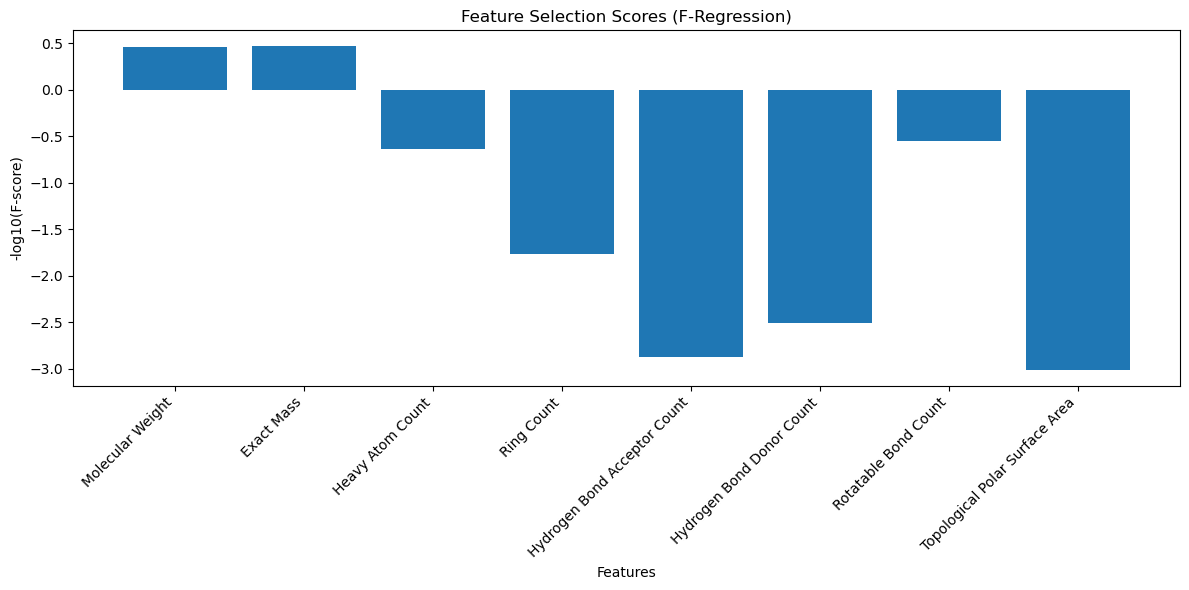

Saved plot: feature_selection_scores.png


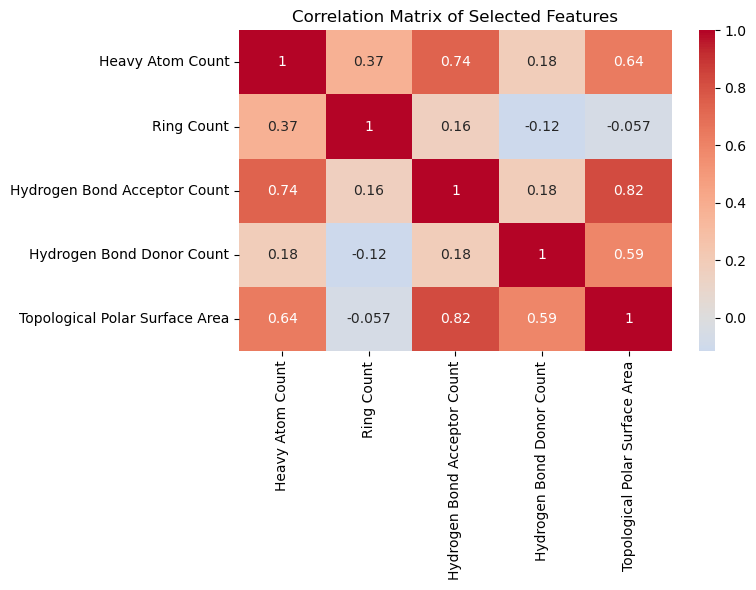

Saved plot: selected_features_correlation.png


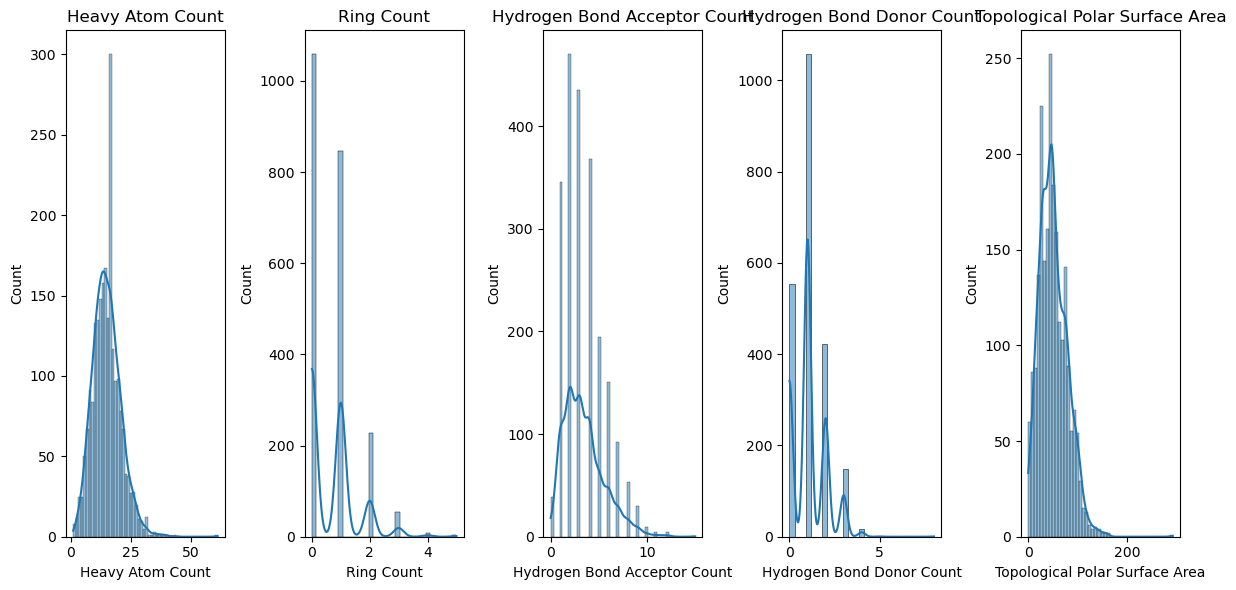

Saved plot: selected_features_distribution.png


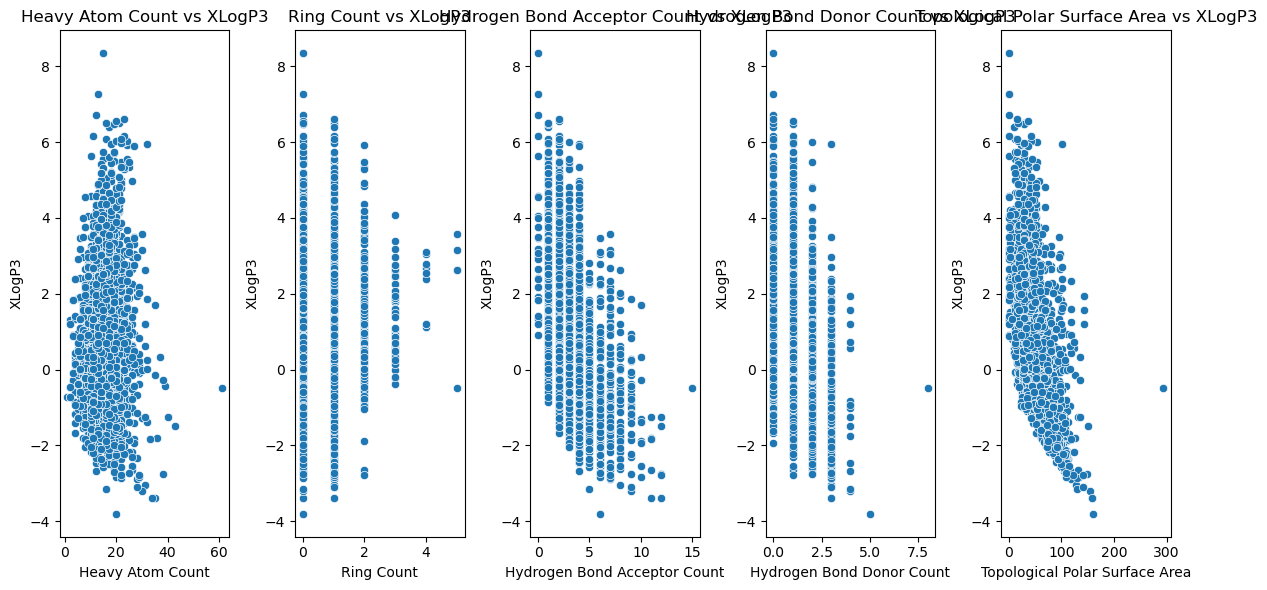

Saved plot: feature_vs_target.png


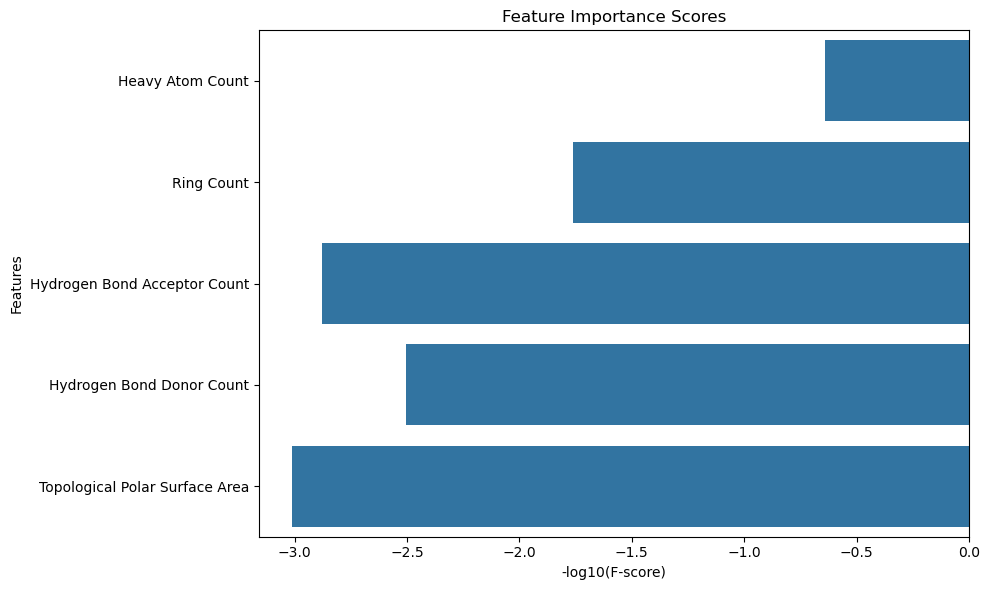

Saved plot: feature_importance_scores.png

Selected features: ['Heavy Atom Count', 'Ring Count', 'Hydrogen Bond Acceptor Count', 'Hydrogen Bond Donor Count', 'Topological Polar Surface Area']

Feature selection complete. Check the 'plots' directory for visualizations.


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.base import clone
from sklearn.linear_model import LinearRegression

# Create plots directory if it doesn't exist
if not os.path.exists('plots'):
    os.makedirs('plots')

def save_plot(plt, filename):
    """Helper function to save and show plot"""
    try:
        plt.tight_layout()
        plt.savefig(f'plots/{filename}.png', dpi=300, bbox_inches='tight')
        plt.show()
        print(f"Saved plot: {filename}.png")
    except Exception as e:
        print(f"Error saving plot {filename}: {str(e)}")

def plot_feature_selection(X, y, selected_features):
    """Generate feature selection visualizations"""
    print("\nGenerating feature selection plots...")
    
    # 1. Feature Selection Scores
    plt.figure(figsize=(12, 6))
    scores = -np.log10(f_regression(X, y)[0])
    plt.bar(range(len(scores)), scores)
    plt.xticks(range(len(scores)), X.columns, rotation=45, ha='right')
    plt.title('Feature Selection Scores (F-Regression)')
    plt.xlabel('Features')
    plt.ylabel('-log10(F-score)')
    save_plot(plt, 'feature_selection_scores')
    
    # 2. Correlation Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(X[selected_features].corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix of Selected Features')
    save_plot(plt, 'selected_features_correlation')
    
    # 3. Feature Distributions
    plt.figure(figsize=(12, 6))
    for i, feature in enumerate(selected_features):
        plt.subplot(1, len(selected_features), i+1)
        sns.histplot(X[feature], kde=True)
        plt.title(feature)
    plt.tight_layout()
    save_plot(plt, 'selected_features_distribution')
    
    # 4. Feature vs Target
    plt.figure(figsize=(12, 6))
    for i, feature in enumerate(selected_features):
        plt.subplot(1, len(selected_features), i+1)
        sns.scatterplot(x=X[feature], y=y)
        plt.title(f'{feature} vs XLogP3')
        plt.xlabel(feature)
        plt.ylabel('XLogP3')
    plt.tight_layout()
    save_plot(plt, 'feature_vs_target')
    
    # 5. Feature Importance Plots
    plt.figure(figsize=(10, 6))
    # Get the scores for selected features using correct indexing
    selected_scores = scores[X.columns.get_indexer(selected_features)]
    sns.barplot(x=selected_scores, y=selected_features)
    plt.title('Feature Importance Scores')
    plt.xlabel('-log10(F-score)')
    plt.ylabel('Features')
    save_plot(plt, 'feature_importance_scores')

def load_and_preprocess_data():
    print("\nLoading and preprocessing data...")
    # Load the linker dataset
    df = pd.read_csv('linker.csv')
    
    # Select numerical features
    numerical_features = ['Molecular Weight', 'Exact Mass', 'Heavy Atom Count',
                         'Ring Count', 'Hydrogen Bond Acceptor Count',
                         'Hydrogen Bond Donor Count', 'Rotatable Bond Count',
                         'Topological Polar Surface Area']
    
    # Create feature matrix and target variable
    X = df[numerical_features]
    y = df['XLogP3']
    
    # Print statistics
    print("\nFeature statistics:")
    print(X.describe())
    print("\nTarget variable statistics:")
    print(y.describe())
    
    return X, y

def feature_selection(X, y):
    print("\nPerforming feature selection...")
    # Create preprocessing pipeline
    preprocessor = ColumnTransformer(
        transformers=[
            ('scaler', StandardScaler(), list(X.columns))
        ],
        remainder='passthrough'
    )
    
    # First, preprocess the data
    X_preprocessed = preprocessor.fit_transform(X)
    
    # Then select features
    selector = SelectKBest(f_regression, k=5)
    X_selected = selector.fit_transform(X_preprocessed, y)
    
    # Get the names of selected features
    selected_features = X.columns[selector.get_support()].tolist()
    print("\nSelected features:", selected_features)
    
    # Create the transformer with fitted components
    transformer = ColumnTransformer(
        transformers=[
            ('preprocess', preprocessor, list(X.columns)),
            ('select', selector, list(X.columns))
        ],
        remainder='drop'
    )
    
    transformer.fit(X, y)
    
    # Generate feature selection plots
    plot_feature_selection(X, y, selected_features)
    
    return X_selected, transformer, selected_features

def main():
    print("\nStarting main process...")
    # Load and preprocess data
    X, y = load_and_preprocess_data()
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Feature selection
    X_selected, transformer, selected_features = feature_selection(X_train, y_train)
    
    print("\nSelected features:", selected_features)
    print("\nFeature selection complete. Check the 'plots' directory for visualizations.")

if __name__ == "__main__":
    main()